# 911 Calls Exploratory Data Analysis

Alvee Hoque


Data: From [Kaggle](https://www.kaggle.com/mchirico/montcoalert)

Objective: Exploratory Data Analysis 

Dataset contains the following fields: 

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

###  Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

### Load Data and Head

In [2]:
df = pd.read_csv('complete_911_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661216 entries, 0 to 661215
Data columns (total 9 columns):
lat          661216 non-null float64
lng          661216 non-null float64
desc         661216 non-null object
zip          581287 non-null float64
title        661216 non-null object
timeStamp    661216 non-null object
twp          660924 non-null object
addr         661216 non-null object
e            661216 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 45.4+ MB


In [5]:
df.head(15)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1


#### Top 5 zipcodes/townships:

In [6]:
df['zip'].value_counts().head()

19401.0    45423
19464.0    43775
19403.0    34749
19446.0    32145
19406.0    22382
Name: zip, dtype: int64

In [7]:
df['twp'].value_counts().head()

LOWER MERION    55322
ABINGTON        39812
NORRISTOWN      37479
UPPER MERION    35885
CHELTENHAM      30468
Name: twp, dtype: int64

### Emergency Categories:

In [8]:
df['title'].head(10)

0         EMS: BACK PAINS/INJURY
1        EMS: DIABETIC EMERGENCY
2            Fire: GAS-ODOR/LEAK
3         EMS: CARDIAC EMERGENCY
4                 EMS: DIZZINESS
5               EMS: HEAD INJURY
6           EMS: NAUSEA/VOMITING
7     EMS: RESPIRATORY EMERGENCY
8          EMS: SYNCOPAL EPISODE
9    Traffic: VEHICLE ACCIDENT -
Name: title, dtype: object

In [9]:
df['title'].nunique()

148

In [10]:
df['reason'] = df['title'].apply(lambda x: x.split(":")[0])
df['reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: reason, dtype: object

In [11]:
df['reason'].value_counts()

EMS        331417
Traffic    229548
Fire       100251
Name: reason, dtype: int64

Text(0.5, 1.0, 'Reasons for Emergency Calls')

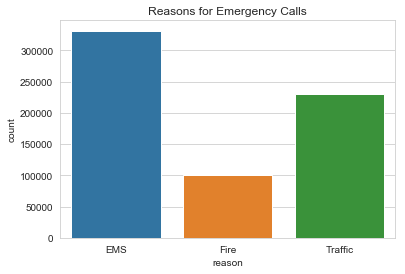

In [12]:
sns.countplot(df['reason'])
plt.title("Reasons for Emergency Calls")

Text(0.5, 1.0, 'Emergency Call Counts in Lower Merion')

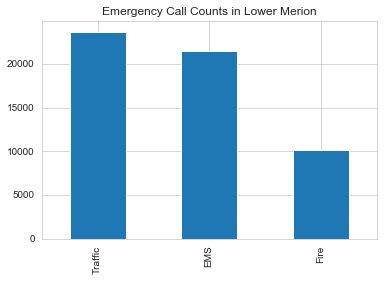

In [13]:
df[df['twp'] == 'LOWER MERION']['reason'].value_counts().plot(kind='bar')
plt.title("Emergency Call Counts in Lower Merion")

Text(0.5, 1.0, 'Emergency Calls in 19401')

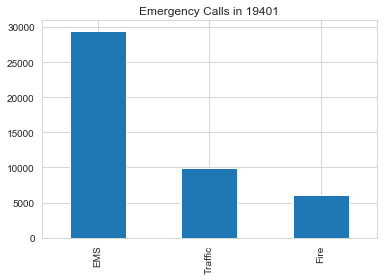

In [14]:
df[df['zip'] == 19401]['reason'].value_counts().plot(kind='bar')
plt.title("Emergency Calls in 19401")

#### Notes:
In Lower Merion, there are more calls related to traffic and EMS. In the zip code 19401 (Norristown/East Norriton/West Norriton) there is a higher amount of EMS calls. 

### Date/Time Charts

In [15]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['timeStamp'].head()

0   2015-12-10 17:10:52
1   2015-12-10 17:29:21
2   2015-12-10 14:39:21
3   2015-12-10 16:47:36
4   2015-12-10 16:56:52
Name: timeStamp, dtype: datetime64[ns]

In [16]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

Map Day of Week to actual string names.

In [17]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day']=df['Day of Week'].map(dmap)
df['Day'].value_counts()

Fri    102594
Wed     98898
Thu     98297
Tue     97314
Mon     96416
Sat     89134
Sun     78563
Name: Day, dtype: int64

Text(0.5, 1.0, 'Emergency Calls by Day')

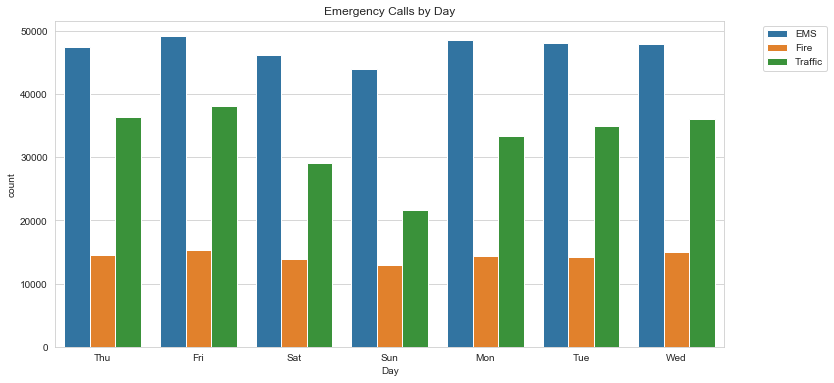

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(x ='Day',hue = 'reason', data = df)
plt.legend(bbox_to_anchor=(1.05,1), loc = 2)
plt.title("Emergency Calls by Day")

Text(0.5, 1.0, 'Emergency Calls by Month')

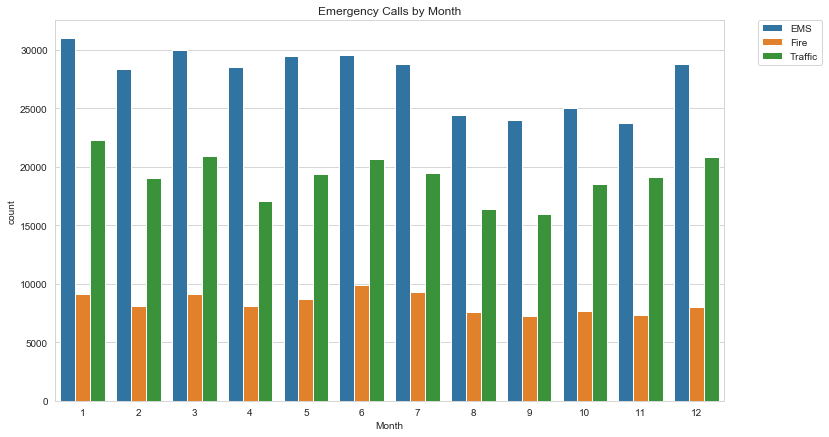

In [18]:
plt.figure(figsize=(12,7))
sns.countplot(x ='Month',hue = 'reason', data = df)
plt.legend(bbox_to_anchor=(1.05,1), loc = 2, borderaxespad=0)
plt.title("Emergency Calls by Month")

In [19]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day of Week,Day
Month,,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509,57509


Text(0.5, 1.0, 'Count of Calls per Month')

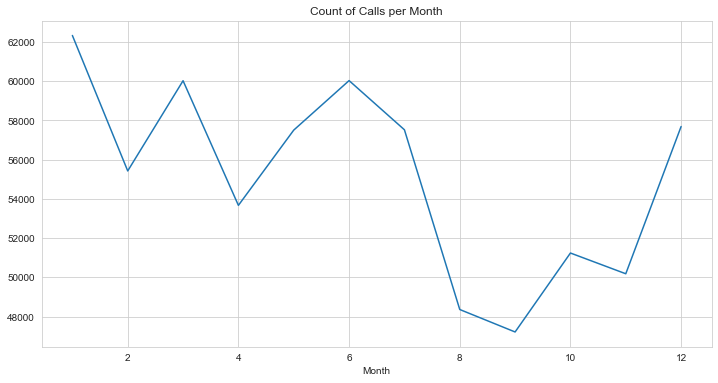

In [20]:
byMonth['lat'].plot(figsize=(12,6))
plt.title("Count of Calls per Month")

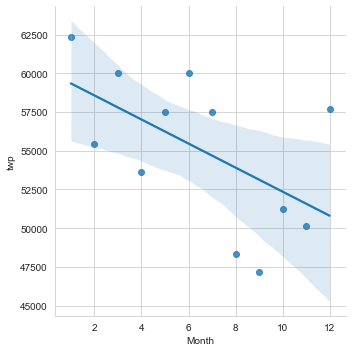

In [21]:
sns.lmplot(x='Month',y='twp', data=byMonth.reset_index())

In [22]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())
df['Date'].head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: Date, dtype: object

In [23]:
byDate = df.groupby('Date').count()
byDate['lat'].head()

Date
2015-12-10    114
2015-12-11    391
2015-12-12    402
2015-12-13    316
2015-12-14    444
Name: lat, dtype: int64

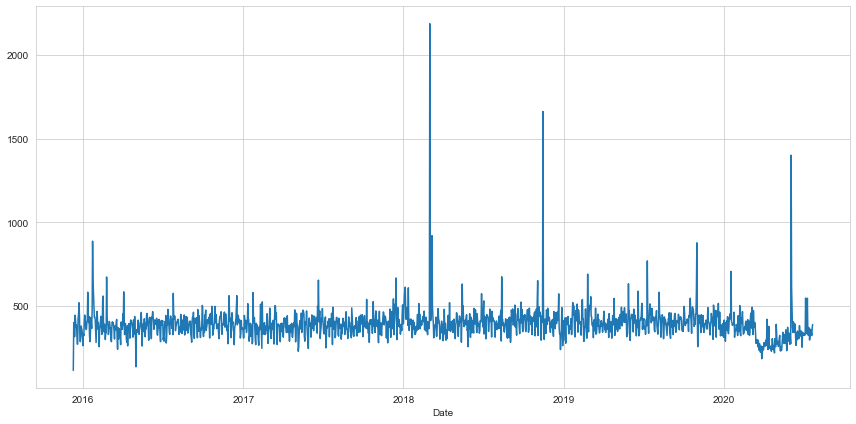

In [34]:
byDate['lat'].plot(figsize=(12,6))
plt.tight_layout()

### Heatmaps/Clustermaps

In [24]:
dayHour = df.groupby(by = ['Day of Week', 'Hour']).count()['reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
0,1883,1564,1364,1269,1332,1834,2667,4416,5494,5710,...,5693,6269,6327,6393,5426,4478,3788,3241,2650,2064
1,1714,1455,1319,1205,1240,1733,2771,4408,5602,5546,...,5904,6235,6464,6867,5615,4605,3837,3396,2695,2128
2,1658,1473,1255,1253,1121,1602,2658,4631,5454,5422,...,6053,6507,6745,7062,5691,4686,4116,3535,2807,2186
3,1729,1402,1423,1230,1291,1768,2805,4421,5281,5386,...,6053,6454,6348,6914,5487,4679,4029,3477,2836,2349
4,1977,1629,1444,1293,1326,1638,2659,4131,5010,5272,...,6356,7019,7039,7099,5648,5040,4365,3901,3408,2828


Text(0.5, 1, 'Heatmap of Emergency Calls by Day of Week')

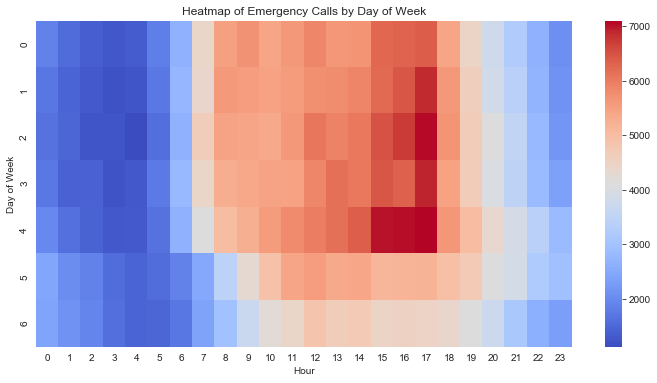

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='coolwarm')
plt.title("Heatmap of Emergency Calls by Day of Week")

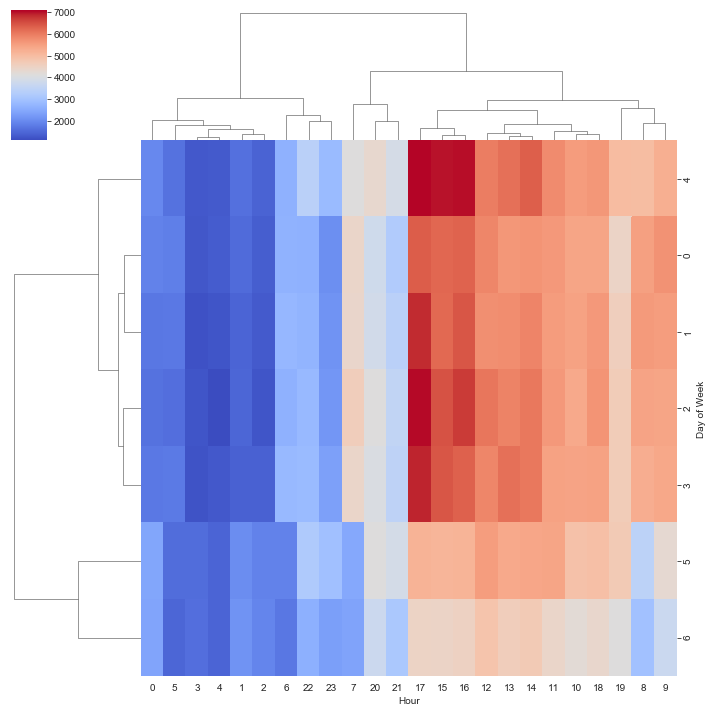

In [26]:
sns.clustermap(dayHour, cmap='coolwarm')

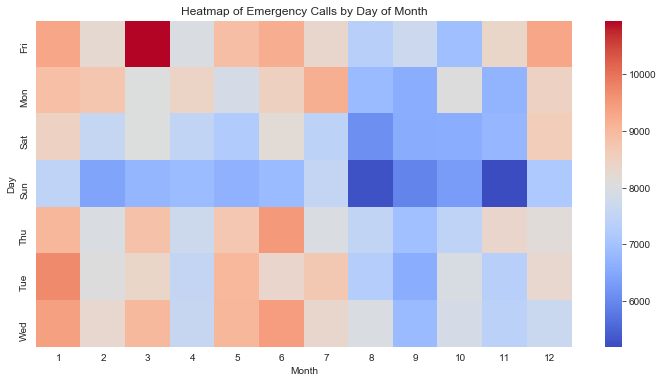

In [27]:
dayMonth = df.groupby(by=['Day','Month']).count()['reason'].unstack()
plt.figure(figsize=(12,6))
plt.title("Heatmap of Emergency Calls by Day of Month")
sns.heatmap(dayMonth, cmap = 'coolwarm')

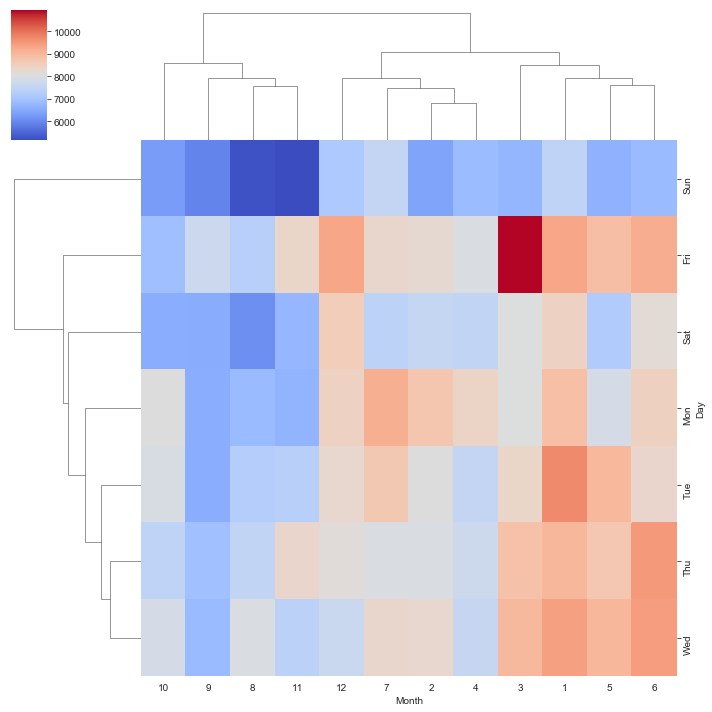

In [28]:
sns.clustermap(dayMonth, cmap = 'coolwarm')

#### Notes
There were more calls during the evenings (3pm-7pm) and higher on Fridays. People called for emergency services more on Friday's in March. 